### 1. 라이브러리 설치

In [44]:
%pip install opendartreader finance-datareader

# 원하는 기업 : 마음 AI (377480)
# 조회기간 : (2023-01-01 - 2023-08-14)

Note: you may need to restart the kernel to use updated packages.


### 2. 조회 기간 중 최신 사업보고서 찾기

In [45]:
import OpenDartReader

### 0. 객체 생성 ###
# 객체 생성 (API KEY 지정)
api_key = '9be6509f76d34bd1447a21924e959191930c998c'

dart = OpenDartReader(api_key)
dart_list = dart.list('377480', start='2023-01-01', end='2023-08-14', kind='A', final=False)

# 조회 기간 중 가장 최신 사업보고서의 idx
report_idx = dart_list['rcept_no'][0]

# 해당 idx에 해당하는 사업보고서 Raw Text 추출
xml_text = dart.document(report_idx)
xml_text

'<?xml version="1.0" encoding="utf-8"?>\r\n\r\n\r\n<DOCUMENT xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:noNamespaceSchemaLocation="dart3.xsd">\n\n<DOCUMENT-NAME ACODE="11012">반기보고서</DOCUMENT-NAME>\n<FORMULA-VERSION ADATE="20230701">5.2</FORMULA-VERSION>\n<COMPANY-NAME AREGCIK="01297898">(주)마음에이아이</COMPANY-NAME>\n\n<SUMMARY>\n<EXTRACTION ACODE="CRP_RGS_NO_TEMP" AFEATURE="BOTH">160111-0362866</EXTRACTION>\n</SUMMARY>\n\n\n<BODY>\n\n<COVER>\n<P></P>\n<COVER-TITLE ATOC="Y" AASSOCNOTE="COVER">반 기 보 고 서</COVER-TITLE>\n<P></P>\n<P USERMARK="F-16">                                    (제 10기)</P>\n\n<TABLE-GROUP ACLASS="COVER" ADELETETABLE="N">\n\n<TABLE ACLASS="EXTRACTION" AFIXTABLE="Y" WIDTH="600" BORDER="0">\n\n<COLGROUP>\n<COL WIDTH="209"></COL>\n<COL WIDTH="153"></COL>\n<COL WIDTH="211"></COL>\n</COLGROUP>\n\n<TBODY>\n\n<TR ACOPY="N" ADELETE="N">\n<TD CLASS="NORMAL" ROWSPAN="2" ALIGN="RIGHT" VALIGN="MIDDLE" WIDTH="218" HEIGHT="60" AUPDATECONT="N">사업연도</TD>\n<TU CLASS="NORMAL"

### 3. 텍스트 추출 & 전처리 + 텍스트 파일 저장

In [46]:
import re # 전처리 함수

def extract_refine_text(html_string):
    # Remove CSS styles
    no_css = re.sub('<style.*?</style>', '', html_string, flags=re.DOTALL)

    # Remove Inline CSS
    no_inline_css = re.sub('\..*?{.*?}', '', no_css, flags=re.DOTALL)

    # Remove specific undesired strings
    no_undesired = re.sub('\d{4}[A-Za-z0-9_]*" ADELETETABLE="N">', '', no_inline_css)

    # Remove HTML tags
    no_tags = re.sub('<[^>]+>', ' ', no_undesired)

    # Remove special characters and whitespaces
    cleaned = re.sub('\s+', ' ', no_tags).strip()

    # Remove the □ character
    no_square = re.sub('□', '', cleaned)

    # Replace \' with '
    final_text = re.sub(r"\\'", "'", no_square)

    return final_text


refined_text = extract_refine_text(xml_text)
print(refined_text) # 텍스트 전처리 여부 확인



with open(f"마음AI_{report_idx}.txt", 'w', encoding='utf-8') as f:
          f.write(refined_text) # 텍스트 파일 저장

연결 재무상태표 제 10 기 반기말 연결 포괄손익계산서 제 10 기 반기 연결 자본변동표 제 10 기 반기 연결 현금흐름표 제 10 기 반기 재무상태표 제 10 기 반기말 포괄손익계산서 제 10 기 반기 자본변동표 제 10 기 반기 현금흐름표 제 10 기 반기 2023.01.01 부터 2023.06.30 까지 제 9 기 반기 2022.01.01 부터 2022.06.30 까지 (단위 : 원) 제 10 기 반기 제 9 기 반기 영업활동현금흐름 (1,119,957,815) (1,926,361,904) 영업으로부터 창출된 현금흐름 (1,364,547,584) (1,989,933,997) 이자수취(영업) 249,488,599 79,804,128 이자지급(영업) (6,511,525) 법인세납부(환급) (4,898,830) (9,720,510) 투자활동현금흐름 1,552,843,862 (5,698,786,206) 임차보증금의 증가 (28,600,000) 금융리스자산의 처분 리스채권의 감소 2,579,199 3,868,800 임차보증금의 감소 4,016,036,000 32,044,660 단기대여금및수취채권의 회수 200,000,000 단기대여금의 지급 (240,000,000) 정부보조금의 수취 2,000,000 유형자산의 취득 (2,637,171,337) (5,374,299,666) 무형자산의 취득 (122,400,000) 재무활동현금흐름 18,231,460,916 5,505,511,702 주식선택권행사로 인한 현금유입 811,322,550 370,246,625 리스료의 지급 (129,075,934) (202,249,523) 장기차입금의 증가 전환사채의 발행 15,000,000,000 사채발행비의 지급 (75,000,000) 차입금의 차입 2,624,214,300 5,337,514,600 환율변동효과 반영전 현금및현금성자산의 순증가(감소) 18,664,346,963 (2,119,636,408) 기초현금및현금성자산 9,920,525,059 18,451,271,791 현금및현금

### 4. 캔들차트 그리기

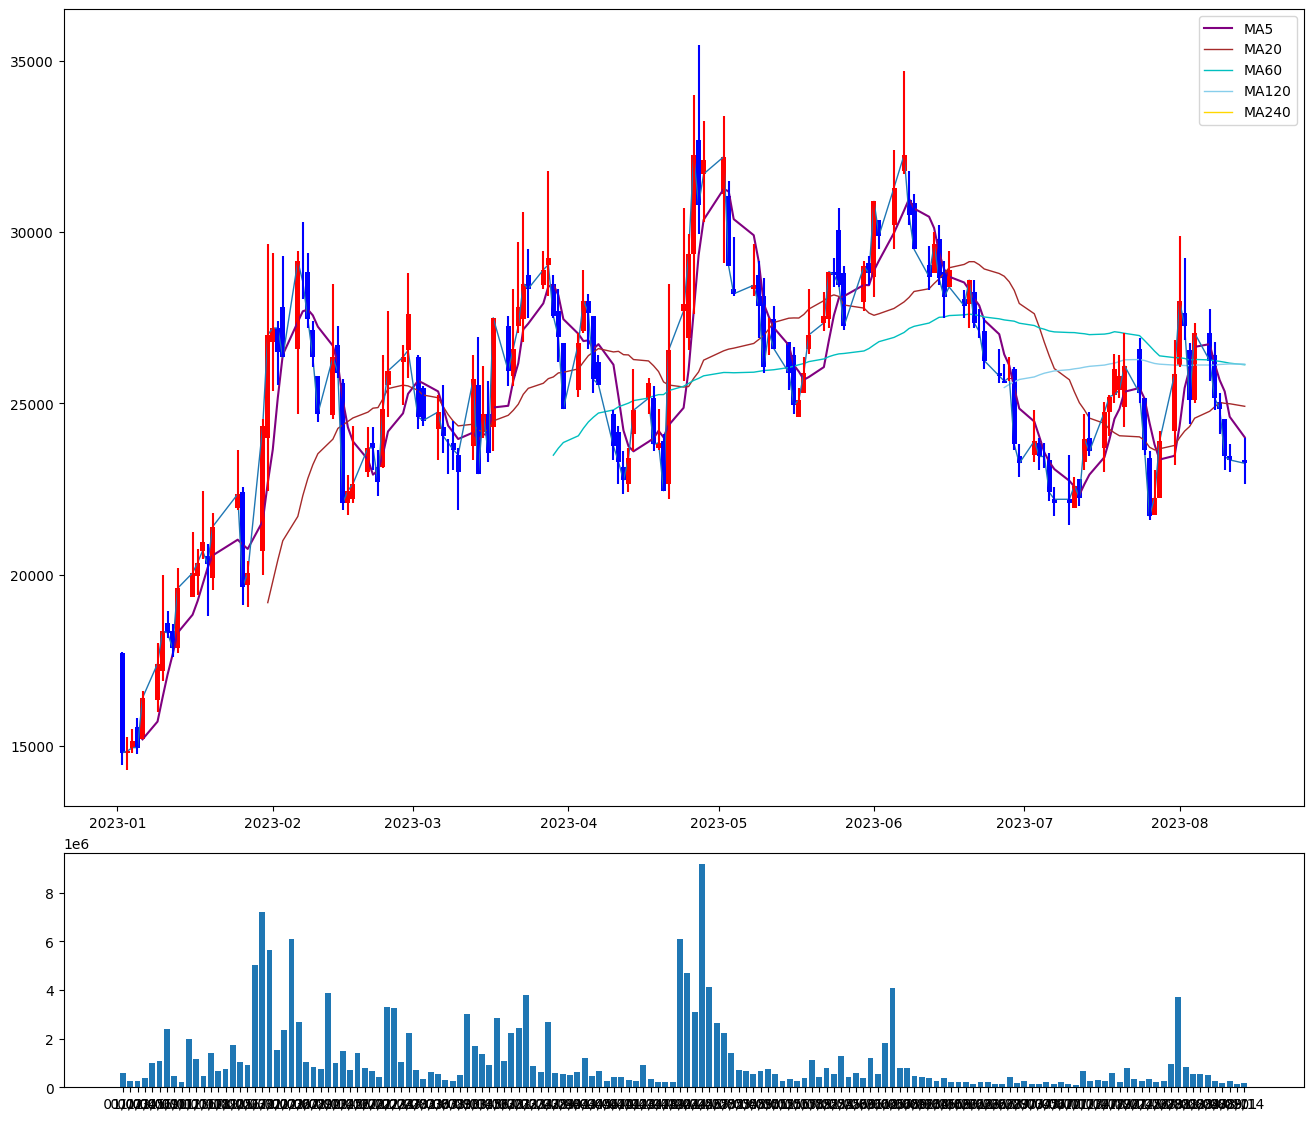

<Figure size 640x480 with 0 Axes>

In [48]:
import FinanceDataReader as fdr
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import sys

# 아래 두 코드만으로도 주식정보를 가지고 온다.
df_krx = fdr.StockListing('KRX')
df_krx.to_csv('stockList.csv', mode='w', encoding='utf-8-sig')

# 이름으로 코드를 찾기위한 단순한 함수
def codeFromName(name):
    nameList=list(df_krx['Name'])
    return df_krx['Symbol'][nameList.index(name)]

dayBfNum        = 1000
strToday        = (datetime.datetime.today()).strftime("%Y%m%d")
strFromDay      = (datetime.datetime.today()-datetime.timedelta(dayBfNum)).strftime("%Y%m%d")
strShowFromDay  = (datetime.datetime.today()-datetime.timedelta(365)).strftime("%Y%m%d")

try:
    # 코드와 기간을 가지고 주식 가격정보를 가지고 올 수 있다니... 너무 편한데?
    df = fdr.DataReader('377480', '2023-01-01', '2023-08-14')

    # 나는 파일로 저장해서 확인하는게 편하더라.
    df.to_csv('stockDtlList.csv', mode='w', encoding='utf-8-sig')

    #이평선 데이터 추가
    ma5 = pd.DataFrame(  df['Close'].rolling(window=5).mean())
    ma20 = pd.DataFrame( df['Close'].rolling(window=20).mean())
    ma60 = pd.DataFrame( df['Close'].rolling(window=60).mean())
    ma120 = pd.DataFrame(df['Close'].rolling(window=120).mean())
    ma240 = pd.DataFrame(df['Close'].rolling(window=240).mean())

    df.insert(len(df.columns), '5일', ma5)
    df.insert(len(df.columns), '20일', ma20)
    df.insert(len(df.columns), '60일', ma60)
    df.insert(len(df.columns), '120일', ma120)
    df.insert(len(df.columns), '240일', ma240)

    # 날짜로 필터
    # df = df[(df.index >= strShowFromDay)] # 이평선이 중간부터 표시되는게 싫어서, 앞부분 필터
    # 1. 데이터 필터링 문제
    # 데이터를 필터링할 때 strShowFromDay 이후의 데이터만 남기고 있습니다.
    # df = df[df.index >= strShowFromDay] 이 부분이 데이터가 너무 적게 남아 그래프에 잘 표현되지 않는 원인일 수 있습니다.
    chart = df

    DateList = list(df.index )
    VolumeList = list(df['Volume'])
    CloseList = list(df['Close'])

    # 날짜 공백 처리하기
    df_date = pd.to_datetime(DateList)
    df_date = df_date.strftime(' %m/%d ')

    fig = plt.figure(figsize=(16, 14))
    top_axes = plt.subplot2grid((4,4), (0,0), rowspan=3, colspan=4)
    bottom_axes = plt.subplot2grid((4,4), (3,0), rowspan=1, colspan=4)

    top_axes.plot(chart.index,  chart['5일'], label='MA5'  , color='purple'   , linewidth= 1.5)
    top_axes.plot(chart.index, chart['20일'], label='MA20' , color='brown'  , linewidth= 1)
    top_axes.plot(chart.index, chart['60일'], label='MA60' , color='c'      , linewidth= 1)
    top_axes.plot(chart.index,chart['120일'], label='MA120', color='skyblue', linewidth= 1)
    top_axes.plot(chart.index,chart['240일'], label='MA240', color='gold' , linewidth= 1)
    top_axes.legend(loc="best")

    top_axes.plot(chart.index,chart['Close'],linewidth= 1)

    top_axes.bar(chart.index, height=chart['Close']-chart['Open'], bottom=chart['Open'], width=1, color=list(map(lambda c: 'red' if c>0 else 'blue', chart['Change'] )))
    top_axes.vlines(chart.index, chart['Low'],chart['High'], color=list(map(lambda c: 'red' if c>0 else 'blue', chart['Change'] )))

    bottom_axes.bar(df_date, df['Volume'])

    #화면에 보여주기
    plt.show()

    #파일로 저장하기
    # plt.savefig(fname=f'{strToday}_{strCode}.png', bbox_inches='tight', pad_inches=0)

except:
    print('종목 이름도 모르면 그냥 끝내야지!')
